# Problem komiwojażera

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform
import random
import math

In [58]:
np.random.seed(42)
n_cities = 10
points = np.random.uniform(-1, 1, (n_cities, 2))
print(points)
print(points.shape)

[[-0.25091976  0.90142861]
 [ 0.46398788  0.19731697]
 [-0.68796272 -0.68801096]
 [-0.88383278  0.73235229]
 [ 0.20223002  0.41614516]
 [-0.95883101  0.9398197 ]
 [ 0.66488528 -0.57532178]
 [-0.63635007 -0.63319098]
 [-0.39151551  0.04951286]
 [-0.13610996 -0.41754172]]
(10, 2)


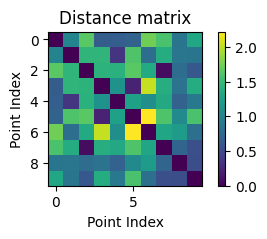

0.7089514881242723


In [59]:
def distance_matrix(points):
    return squareform(pdist(points, 'euclidean'))

dist_matrix = distance_matrix(points)

plt.figure(figsize=(4, 2))
plt.imshow(dist_matrix)
plt.colorbar()
plt.title('Distance matrix')
plt.xlabel('Point Index')
plt.ylabel('Point Index')
plt.show()

print(dist_matrix[0,5])

In [60]:
# Przygotuj swoją funkcję celu dla zadanego problemu.
def route_length(permutation):
    length = 0
    num_points = len(permutation)
    for i in range(num_points - 1):
        length += dist_matrix[permutation[i], permutation[(i + 1)]]
    return length

In [61]:
def display_route(route):
    plt.figure(figsize=(10, 6))
    plt.scatter(points[:, 0], points[:, 1], color='blue')
    plt.plot(points[route, 0], points[route, 1], color='red')
    plt.title(f'Traveling Salesman Problem')
    plt.xlabel('X')
    plt.ylabel('Y')
    for i, txt in enumerate(range(len(points))):
        plt.annotate(txt, (points[i, 0], points[i, 1]))
    plt.grid(True)
    plt.show()

## Implementacja problemu optymalizacyjnego (3)

Random permutation: 	[9, 0, 5, 3, 6, 8, 2, 7, 4, 1]   Distance: 8.062420228627756
Neighborhood: 		[9, 0, 5, 4, 6, 8, 2, 7, 3, 1]   Distance: 9.336146126430423


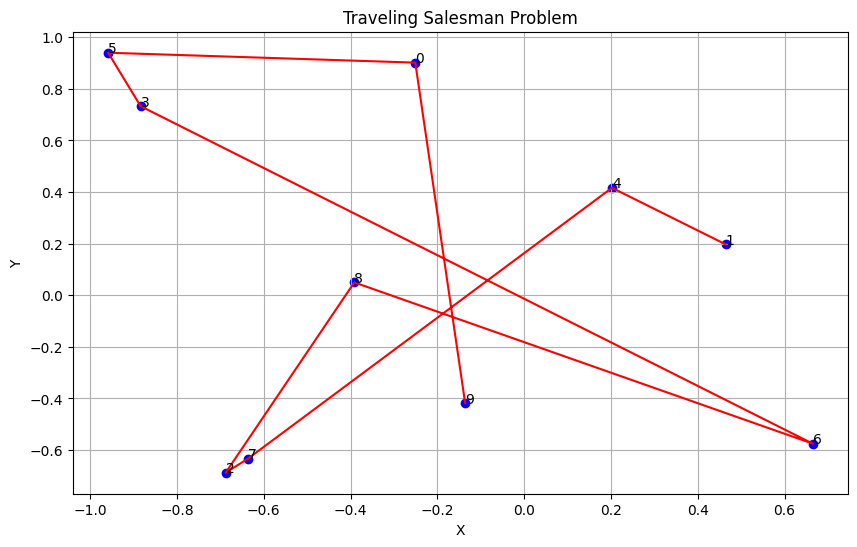

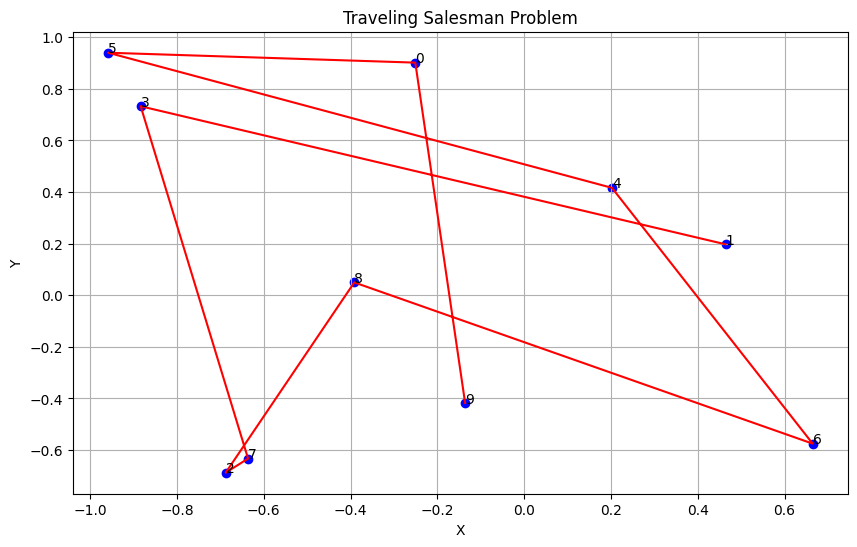

In [62]:
# Przygotuj funkcję która wygeneruje losowe rozwiązanie
def random_solution():
    permutation = list(range(n_cities))
    random.shuffle(permutation)
    return permutation

# Przygotuj metodę, która będzie zwracała bliskie "sąsiedztwo" bieżącego rozwiązania.
def generate_neighborhood(permutation):
    a, b = random.sample(range(len(permutation)), 2)
    new_permutation = permutation[:]
    new_permutation[a], new_permutation[b] = new_permutation[b], new_permutation[a]
    return new_permutation

random_permutation = random_solution()
neighborhood = generate_neighborhood(random_permutation)

print(f'Random permutation: \t{random_permutation}   Distance: {route_length(random_permutation)}')
print(f'Neighborhood: \t\t{neighborhood}   Distance: {route_length(neighborhood)}')

display_route(random_permutation)
display_route(neighborhood)

## Algorytm pełnego przeglądu (1)

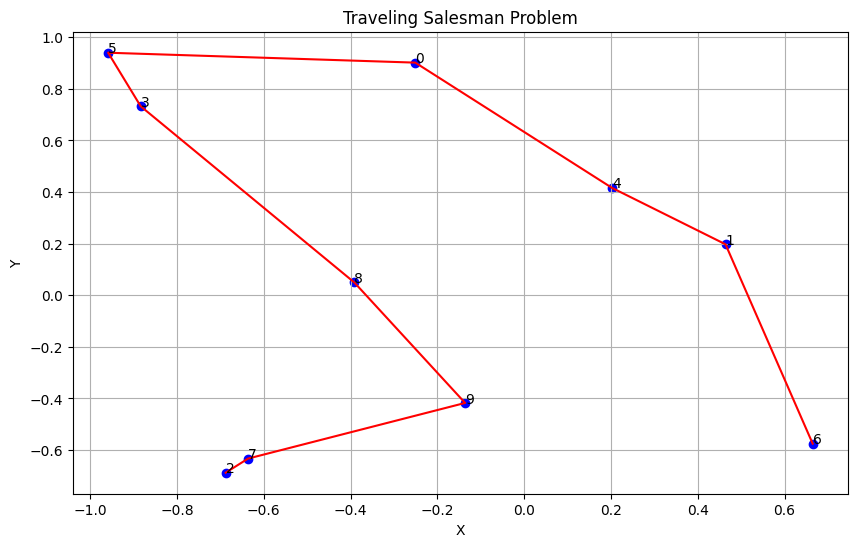

Shortest route: [2, 7, 9, 8, 3, 5, 0, 4, 1, 6]
Minimum distance: 4.727202776781745


In [68]:
from itertools import permutations
from IPython.display import clear_output

def brute_force():    
    all_routes = permutations(range(len(points)))
    min_distance = float('inf')
    shortest_route = None
    
    for route in all_routes:
        route_list = list(route)
        current_distance = route_length(route_list)
        if current_distance < min_distance:
            min_distance = current_distance
            shortest_route = route_list
            clear_output(wait=True)
            display_route(shortest_route)
            print("Shortest route:", shortest_route)
            print("Minimum distance:", min_distance)
    
        
    return shortest_route, min_distance

shortest_route, min_distance = brute_force()

Shortest route: [5, 3, 0, 8, 2, 7, 9, 6, 1, 4]
Minimum distance: 5.109958237160522


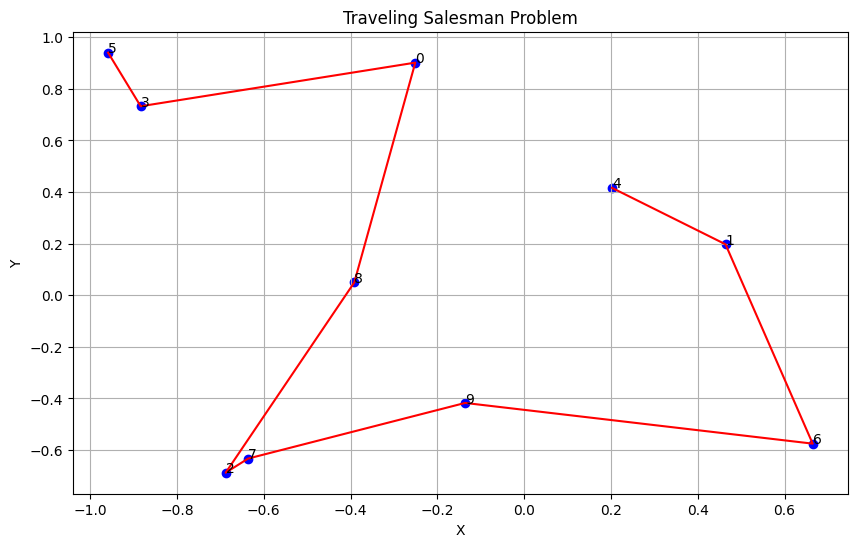

In [71]:
def hill_climbing_best(initial_permutation):
    current_permutation = initial_permutation
    current_distance = route_length(current_permutation)
    
    while True:
        neighborhood = [generate_neighborhood(current_permutation) for _ in range(10000)]  # Generowanie dużej liczby sąsiadów
        best_neighbor = min(neighborhood, key=lambda x: route_length(x))
        best_neighbor_distance = route_length(best_neighbor)
        
        if best_neighbor_distance < current_distance:
            current_permutation = best_neighbor
            current_distance = best_neighbor_distance
        else:
            break  # Brak lepszego sąsiada, osiągnięcie lokalnego minimum
            
    return current_permutation, current_distance

solution, solution_distance = hill_climbing_best(random_solution())


print("Shortest route:", solution)
print("Minimum distance:", solution_distance)
display_route(solution)


Shortest route: [0, 5, 3, 8, 2, 7, 9, 6, 1, 4]
Minimum distance: 5.142174059340948


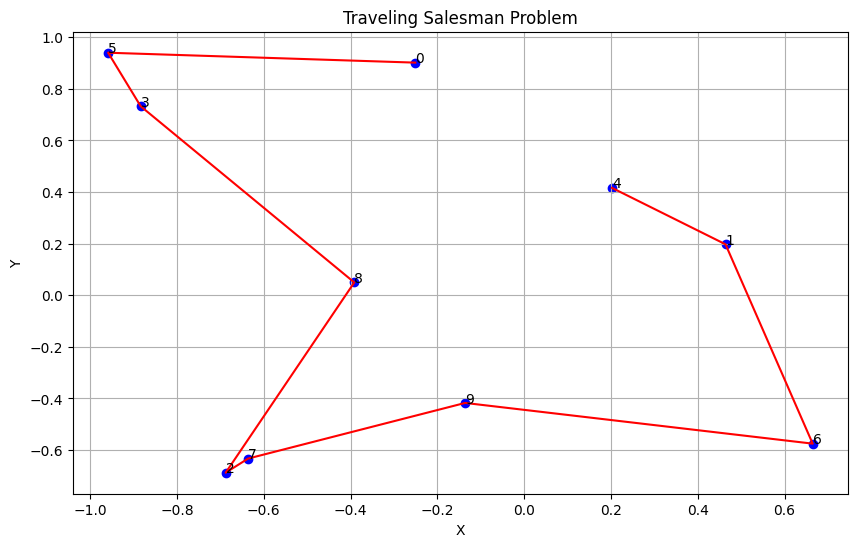

In [72]:
def hill_climbing_random(initial_permutation):
    current_permutation = initial_permutation
    current_distance = route_length(current_permutation)
    
    improved = True
    while improved:
        improved = False
        for _ in range(100):  # Próba znalezienia lepszego rozwiązania wśród losowych sąsiadów
            neighbor = generate_neighborhood(current_permutation)
            neighbor_distance = route_length(neighbor)
            
            if neighbor_distance < current_distance:
                current_permutation = neighbor
                current_distance = neighbor_distance
                improved = True
                break  # Znaleziono lepszego sąsiada i kontynuacja pętli
                
    return current_permutation, current_distance

initial_permutation = random_solution()

solution, solution_distance = hill_climbing_random(initial_permutation)

print("Shortest route:", solution)
print("Minimum distance:", solution_distance)
display_route(solution)

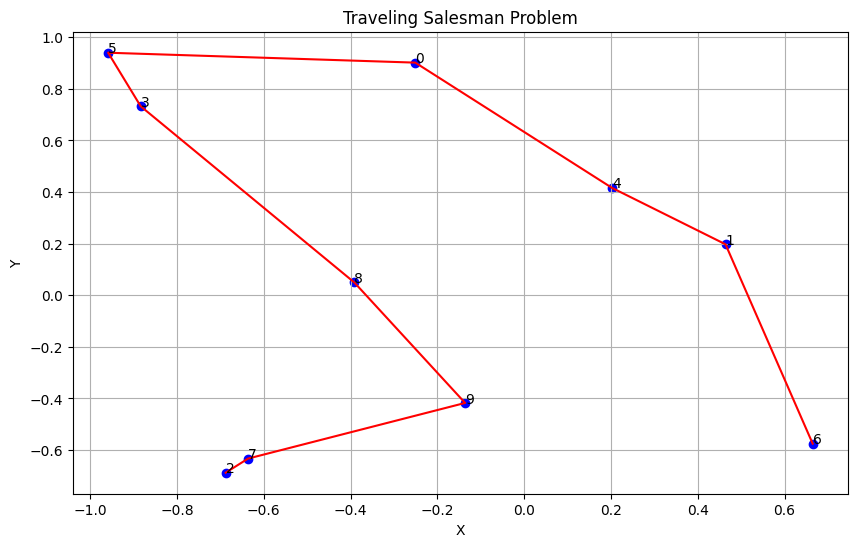

In [78]:
def tabu_search(initial_permutation, tabu_size, iterations):
    current_solution = initial_permutation
    best_solution = current_solution
    best_distance = route_length(best_solution)
    
    tabu_list = []
    history = []  # Historia odwiedzonych rozwiązań
    
    for _ in range(iterations):
        neighborhood = [generate_neighborhood(current_solution) for _ in range(100)]
        neighborhood = [perm for perm in neighborhood if perm not in tabu_list]  # Odfiltrowanie rozwiązań z listy tabu
        
        if not neighborhood:  # Brak dostępnych sąsiadów poza listą tabu
            break
        
        neighborhood_distances = [route_length(perm) for perm in neighborhood]
        best_neighbor_index = neighborhood_distances.index(min(neighborhood_distances))
        best_neighbor = neighborhood[best_neighbor_index]
        
        if route_length(best_neighbor) < best_distance:
            best_solution = best_neighbor
            best_distance = route_length(best_solution)
            history.append(best_solution)  # Dodanie do historii dla ewentualnego cofania się
            
            clear_output(wait=True)
            display_route(best_solution)
        
        # Aktualizacja listy tabu
        if len(tabu_list) >= tabu_size:
            tabu_list.pop(0)  # Usunięcie najstarszego rozwiązania z listy tabu, jeśli osiągnięto maksymalny rozmiar
        tabu_list.append(current_solution)
        
        current_solution = best_neighbor
    
    # Cofanie się do ostatniego punktu roboczego z możliwością kontynuacji obliczeń (1*)
    if history and tabu_size == float('inf'):  # Nieograniczona lista tabu
        last_viable_solution = history[-1]  # Ostatnie rozwiązanie z historii
        return last_viable_solution, route_length(last_viable_solution)
    
    return best_solution, best_distance

# Parametry algorytmu
tabu_size = 16  # Rozmiar listy tabu, możesz ustawić np. na float('inf') dla nieograniczonej listy
iterations = 2000  # Liczba iteracji

# Losowe rozwiązanie początkowe
initial_permutation = random_solution()

# Wykonanie algorytmu Tabu
solution_tabu, distance_tabu = tabu_search(initial_permutation, tabu_size, iterations)

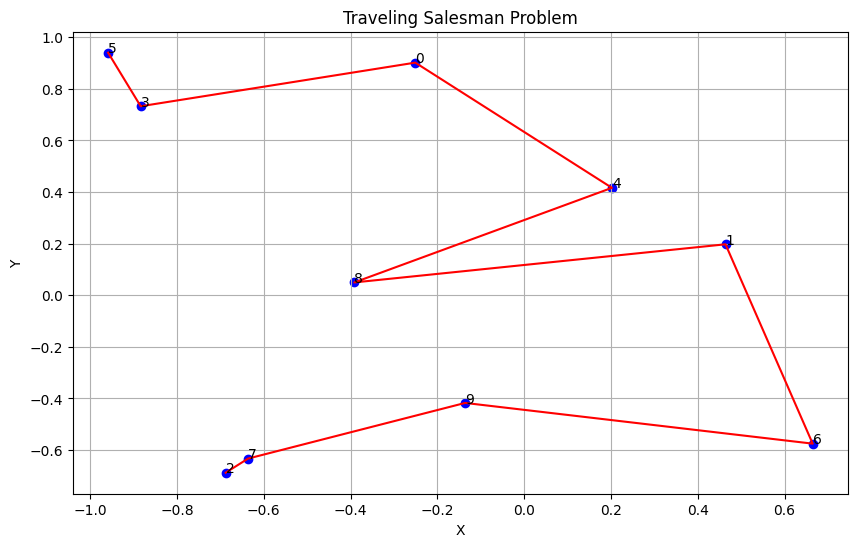

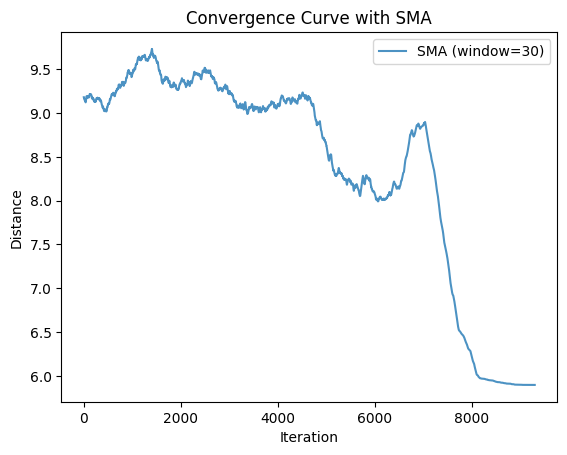

In [151]:
# Funkcja generująca nowego sąsiada przez zamianę punktu z losowym punktem w promieniu
def generate_normal_neighbor(permutation, sigma=0.5):
    neighbor = permutation[:]
    n = len(permutation)
    # Losowanie indeksu punktu (x, y)
    i = np.random.randint(0, n)
    x = neighbor[i]
    
    # Znalezienie punktów w promieniu sigma
    distances = dist_matrix[x]
    close_points = np.where((distances < sigma) & (distances > 0))[0]
    if len(close_points) > 0:
        j = np.random.choice(close_points)
    else:
        j = (i + 1) % n  # W przypadku braku bliskich punktów, wybierz następny punkt w permutacji
    
    # Zamiana punktów
    neighbor[i], neighbor[j] = neighbor[j], neighbor[i]
    return neighbor

def simulated_annealing(initial_solution, alpha, iterations):
    current_solution = initial_solution
    current_distance = route_length(current_solution)
    best_solution = current_solution
    best_distance = current_distance
    
    distances = [current_distance]
    
    for k in range(iterations):
        temp = temp_function(k)
        new_solution = generate_normal_neighbor(current_solution, temp) #generate_normal_neighbor / generate_neighborhood
        new_distance = route_length(new_solution)
        
        if new_distance < current_distance or math.exp((current_distance - new_distance) / temp) > np.random.rand():
            current_solution = new_solution
            current_distance = new_distance
            
            if new_distance < best_distance:
                best_solution = new_solution
                best_distance = new_distance
                
                clear_output(wait=True)
                display_route(best_solution)
                
        distances.append(current_distance)
                
    return best_solution, best_distance, distances

# Wykres krzywej zbieżności z SMA
def plot_convergence_curve(distances):
    smoothed_distances = simple_moving_average(distances, window_size=700)
    plt.plot(smoothed_distances, label='SMA (window=30)', alpha=0.8)
    #plt.plot(range(len(smoothed_distances)), smoothed_distances, label='SMA (window=30)', color='red')
    plt.xlabel('Iteration')
    plt.ylabel('Distance')
    plt.title('Convergence Curve with SMA')
    plt.legend()
    plt.show()

# moja własna funkcja temperatury
def temp_function(k):
    #return (k/iterations)
    #return 1 - k/iterations
    #return np.cos((k * np.pi) / (2 * iterations)) ** 1
    return 2 * np.sqrt(2) * np.cos((k * np.pi) / (2 * iterations)) ** 2

iterations = 10000  # Liczba iteracji

# Rozwiązanie początkowe
initial_solution = random_solution()

# Wykonanie algorytmu symulowanego wyżarzania
solution_sa, distance_sa, distances = simulated_annealing(initial_solution, alpha, iterations)

# Funkcja do obliczania SMA
def simple_moving_average(data, window_size):
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

# Wyświetlenie krzywej zbieżności
plot_convergence_curve(distances)

In [136]:
def pmx(parent1, parent2):
    size = len(parent1)
    point1, point2 = sorted(random.sample(range(size), 2))
    offspring = [None]*size
    offspring[point1:point2] = parent1[point1:point2]
    
    for i in range(point1, point2):
        if parent2[i] not in offspring:
            j = i
            while offspring[j] is not None:
                j = parent2.index(parent1[j])
            offspring[j] = parent2[i]
    
    for i in range(size):
        if offspring[i] is None:
            offspring[i] = parent2[i]
    return offspring

In [102]:
def ox(parent1, parent2):
    size = len(parent1)
    point1, point2 = sorted(random.sample(range(size), 2))
    offspring = [None]*size
    offspring[point1:point2] = parent1[point1:point2]
    
    parent2_indices = [i for i in range(size) if parent2[i] not in offspring[point1:point2]]
    offspring_indices = [i for i in range(size) if i < point1 or i >= point2]
    
    for offspring_index, parent2_index in zip(offspring_indices, parent2_indices):
        offspring[offspring_index] = parent2[parent2_index]
    return offspring

In [103]:
def swap_mutation(individual):
    a, b = random.sample(range(len(individual)), 2)
    individual[a], individual[b] = individual[b], individual[a]
    return individual

In [104]:
def scramble_mutation(individual):
    start, end = sorted(random.sample(range(len(individual)), 2))
    middle = individual[start:end]
    random.shuffle(middle)
    individual[start:end] = middle
    return individual

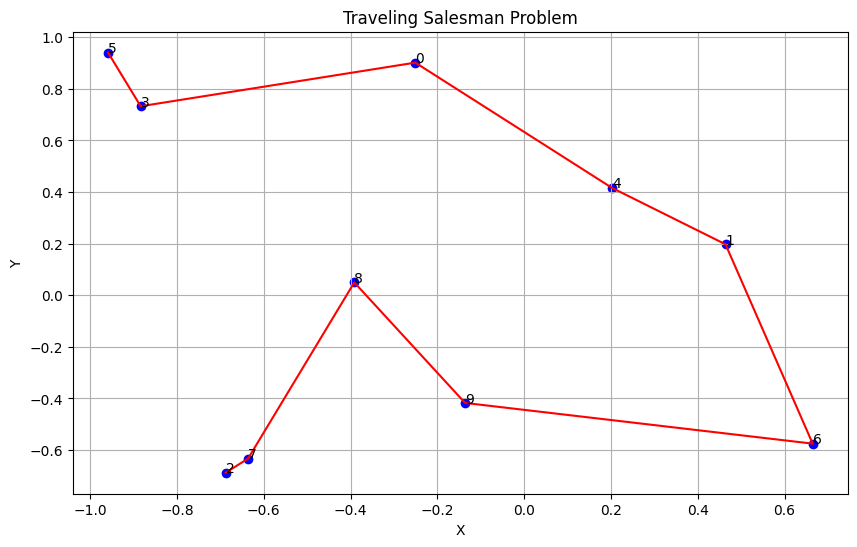

In [105]:
def genetic_algorithm(population_size, crossover, mutation, termination_condition, elite=False):
    population = [random_solution() for _ in range(population_size)]
    generation = 0
    best_solution = None
    best_distance = float('inf')
    
    while not termination_condition(generation, best_distance):
        new_population = []
        population = sorted(population, key=lambda x: route_length(x))
        
        if elite:  # Zachowanie najlepszego osobnika
            new_population.append(population[0])
        
        while len(new_population) < population_size:
            parent1, parent2 = select_parents(population)
            offspring = crossover(parent1, parent2)
            offspring = mutation(offspring)
            new_population.append(offspring)
        
        population = new_population
        current_best = min(population, key=lambda x: route_length(x))
        current_best_distance = route_length(current_best)
        
        if current_best_distance < best_distance:
            best_solution = current_best
            best_distance = current_best_distance
            
            clear_output(wait=True)
            display_route(best_solution)
        
        generation += 1
    
    return best_solution, best_distance

def select_parents(population):
    """Prosta selekcja turniejowa dla rodziców."""
    return random.sample(population, 2)

def termination_condition(generation, best_distance, max_generations=100, min_distance=None):
    """Warunek zakończenia algorytmu: maksymalna liczba pokoleń lub osiągnięcie minimalnej odległości."""
    if min_distance and best_distance <= min_distance:
        return True
    return generation >= max_generations

# Przygotowanie parametrów algorytmu
population_size = 50
max_generations = 1000
min_distance = None  # Nie określono minimalnej odległości, więc użyjemy tylko limitu generacji

# Uruchomienie algorytmu genetycznego z PMX i Swap Mutation
best_solution, best_distance = genetic_algorithm(
    population_size=population_size,
    crossover=pmx,
    mutation=swap_mutation,
    termination_condition=lambda generation, best_distance: termination_condition(generation, best_distance, max_generations, min_distance),
    elite=True  # Użycie mechanizmu elity
)

In [106]:
from concurrent.futures import ThreadPoolExecutor

def evaluate_population(population):
    """Ocenia populację równolegle, zwracając listę długości tras."""
    with ThreadPoolExecutor() as executor:
        distances = list(executor.map(lambda ind: route_length(ind), population))
    return distances

In [107]:
def genetic_algorithm_parallel(population_size, crossover, mutation, termination_condition, elite=False):
    population = [random_solution() for _ in range(population_size)]
    generation = 0
    best_solution = None
    best_distance = float('inf')
    
    while not termination_condition(generation, best_distance):
        # Ocenianie populacji równolegle
        distances = evaluate_population(population)
        
        # Sortowanie populacji według oceny (długości trasy)
        population_sorted = sorted(zip(population, distances), key=lambda x: x[1])
        population = [ind for ind, dist in population_sorted]
        
        if elite:  # Zachowanie najlepszego osobnika
            new_population = [population[0]]
        else:
            new_population = []
        
        while len(new_population) < population_size:
            parent1, parent2 = select_parents(population)
            offspring = crossover(parent1, parent2)
            offspring = mutation(offspring)
            new_population.append(offspring)
        
        population = new_population
        best_solution, best_distance = population[0], distances[0]
        generation += 1
    
    return best_solution, best_distance

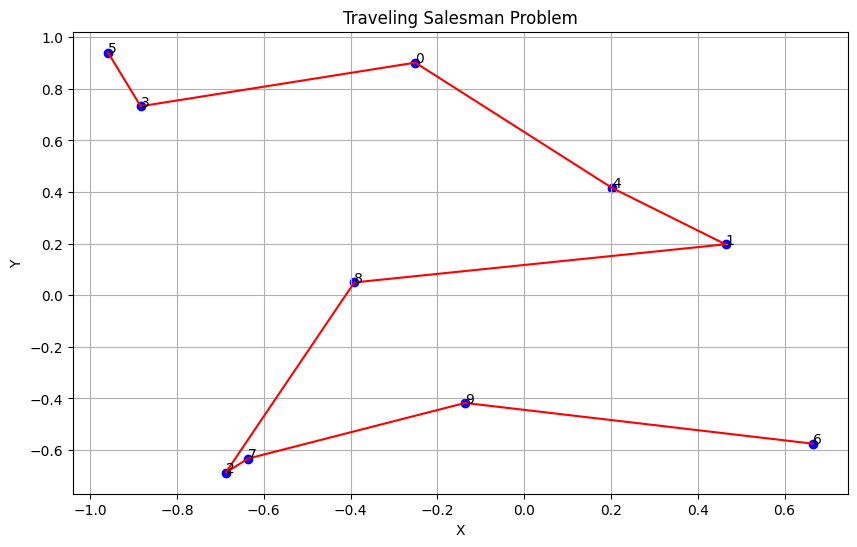

In [108]:
# Uruchomienie algorytmu genetycznego z PMX i Swap Mutation
best_solution, best_distance = genetic_algorithm_parallel(
    population_size=population_size,
    crossover=pmx,
    mutation=swap_mutation,
    termination_condition=lambda generation, best_distance: termination_condition(generation, best_distance, max_generations, min_distance),
    elite=True  # Użycie mechanizmu elity
)

# Wizualizacja najlepszego znalezionego rozwiązania
display_route(best_solution)